<a href="https://colab.research.google.com/github/LCherop/EEG-based-Classification-of-Behavioural-Symptoms-of-Depression/blob/main/Analysis_and_Classification_of_Behavioural_Symptoms_of_Depression_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb

## Grab the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/project_dataset/EEG_machine_learing_data_BRMH.csv')
data.head()


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [ ]:
data.shape

(945, 1149)

In [ ]:
data.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


## Prepare the dataset

### Remove unnecesary columns

In [ ]:
columns_not_needed = ['no.','sex','age','eeg.date','education','IQ']

In [ ]:
data.drop(columns_not_needed,axis=1,inplace=True)
data.head()

,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [ ]:
data.rename(columns = {'main.disorder':'main_disorder'}, inplace = True)
data.rename(columns = {'specific.disorder':'specific_disoder'}, inplace = True)

In [ ]:
main_disorders = list(data.main_disorder.unique())
main_disorders

['Addictive disorder',
 'Trauma and stress related disorder',
 'Mood disorder',
 'Healthy control',
 'Obsessive compulsive disorder',
 'Schizophrenia',
 'Anxiety disorder']

In [ ]:
specific_disoders = list(data.specific_disoder.unique())
specific_disoders

['Alcohol use disorder',
 'Acute stress disorder',
 'Depressive disorder',
 'Healthy control',
 'Behavioral addiction disorder',
 'Obsessive compulsitve disorder',
 'Schizophrenia',
 'Panic disorder',
 'Social anxiety disorder',
 'Posttraumatic stress disorder',
 'Adjustment disorder',
 'Bipolar disorder']

### Check and remove null values

In [ ]:
features_with_null=list(data.columns[data.isna().any()])
len(features_with_null)

1

In [ ]:
data.drop(features_with_null,axis=1,inplace=True)
data.shape

(945, 1142)

### Obtaining data on mood disorders and depression

In [ ]:
data.head()

,main_disorder,specific_disoder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [ ]:
mood_data = data.loc[data['main_disorder'] == 'Mood disorder']
mood_data.shape

(266, 1142)

In [ ]:
#Identify how many specific disorders are under mood disorder
specific_mood_disoders = list(mood_data.specific_disoder.unique())
specific_mood_disoders

['Depressive disorder', 'Bipolar disorder']

In [ ]:
mood_data.shape

(266, 1142)

### Encode the dataset

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
specific_disorder_encoded = le.fit_transform(mood_data['specific_disoder'])

In [ ]:
specific_disorder_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1])

In [ ]:
mood_data.head()

,main_disorder,specific_disoder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
89,Mood disorder,Depressive disorder,12.159137,13.113503,9.031007,14.879389,15.834830,19.595759,11.605911,6.084709,...,65.408894,59.590594,77.310851,75.280467,57.311188,48.015594,59.579033,68.503920,82.885151,86.986191
90,Mood disorder,Depressive disorder,12.404484,9.737819,13.925651,12.325169,15.130696,10.292518,10.263299,11.451697,...,84.366954,53.402639,60.535899,73.838548,72.298636,43.330485,71.298037,23.109295,62.098128,67.749204
91,Mood disorder,Depressive disorder,16.573145,15.586708,14.094928,12.660197,12.979617,10.611797,8.802664,7.509552,...,62.681353,20.062716,36.041763,36.436509,47.491240,20.875426,53.747615,8.009907,50.202188,33.647889
92,Mood disorder,Depressive disorder,26.650019,22.823161,17.942133,17.148214,15.338128,14.571966,7.983127,28.158009,...,86.582363,83.045735,85.752150,85.875624,86.286859,79.520327,84.541455,82.452224,86.950905,87.384296
93,Mood disorder,Depressive disorder,14.624474,14.277301,11.099375,16.047926,17.851932,17.165379,11.682990,6.193040,...,85.309981,58.218838,61.211830,65.038486,76.899037,49.849540,71.791429,39.910653,82.739819,62.285969


### Standardize the dataset

In [ ]:
non_features = ['main_disorder','specific_disoder']
mood_data.drop(non_features,axis=1,inplace= True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
features = mood_data.to_numpy()

In [ ]:
#Specifying the target
y = specific_disorder_encoded
#Specify the features
X = preprocessing.StandardScaler().fit_transform(features)

## Using features with MDD characteristics
The following EEG rythms will be used:
EEG rhythms: δ rhythm (0 - 4Hz), θ
rhythm (4 - 8Hz), α rhythm (8 - 16Hz), β rhythm (16 - 32Hz).
These waveforms have been the best identifiers for diagnosing MDD in patients.

In [ ]:
print(len(mood_data.columns))

1140


In [ ]:
delta_cols = [col for col in mood_data.columns if 'delta' in col]
beta_cols = [col for col in mood_data.columns if 'beta' in col]
theta_cols = [col for col in mood_data.columns if 'theta' in col]
alpha_cols = [col for col in mood_data.columns if 'alpha' in col]

print(f"Number of Delta Columns : {len(delta_cols)}")
print(f"Number of Beta Columns : {len(beta_cols)}")
print(f"Number of Theta Columns : {len(theta_cols)}")
print(f"Number of Alpha Columns : {len(alpha_cols)}")


Number of Delta Columns : 190
Number of Beta Columns : 380
Number of Theta Columns : 190
Number of Alpha Columns : 190


In [ ]:
temp_features = delta_cols + beta_cols +theta_cols + alpha_cols
print(f"Number of items in temp_features : {len(temp_features)}")

Number of items in temp_features : 950


In [ ]:
req_features = mood_data[temp_features].to_numpy()

In [ ]:
#Specifying the target
y = specific_disorder_encoded
#Specify the features
X = preprocessing.StandardScaler().fit_transform(req_features)


In [ ]:
print(X.shape)
print(y.shape)

(266, 950)
(266,)


## Classification

### Splitting the data

In [ ]:
#set aside 25% of train and test data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle = True, random_state=8)

#set aside 20% for validation
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.20, shuffle = True,random_state=8)

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))



X_train shape: (186, 950)
X_test shape: (80, 950)
y_train shape: (186,)
y_test shape: (80,)


### Building the KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

## Model Evaluation

### Accuracy Scores

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 5")

Accuracy is 0.6625  when k = 5


In [ ]:
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 3")

Accuracy is 0.6  when k = 3


In [ ]:
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 3 using the trimmed waveforms(theta,alpha,delta,beta)")

Accuracy is 0.575  when k = 3 using the trimmed waveforms(theta,alpha,delta,beta)


In [ ]:
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 5")

Accuracy is 0.7375  when k = 5


In [ ]:
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 5 using the trimmed waveforms(theta,alpha,delta,beta)")

Accuracy is 0.6567164179104478  when k = 5 using the trimmed waveforms(theta,alpha,delta,beta)


In [ ]:
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 7")

Accuracy is 0.7625  when k = 7


In [ ]:
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 7 using the trimmed waveforms(theta,alpha,delta,beta)")

Accuracy is 0.675  when k = 7 using the trimmed waveforms(theta,alpha,delta,beta)


### Confusion Matrices

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 1 15]
 [ 8 43]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.11      0.06      0.08        16
           1       0.74      0.84      0.79        51

    accuracy                           0.66        67
   macro avg       0.43      0.45      0.43        67
weighted avg       0.59      0.66      0.62        67



## Feature Extraction and Normalisation

To increase model accuracy, feature extraction is performed


### Independent Component Analysis (ICA)

In [ ]:
#FE using ICA
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X_train)

In [ ]:
x_ica_test = ica.fit_transform(X_test)
x_ica_test.shape

(80, 3)

In [ ]:
knn_model.fit(X_ica,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_ica = knn_model.predict(x_ica_test)

In [ ]:
print("Accuracy is",metrics.accuracy_score(y_test,y_pred_ica)," when ICA is used")

Accuracy is 0.775  when ICA is used


In [ ]:
print("Accuracy is",metrics.accuracy_score(y,y_pred_ica)," when ICA is used")

Accuracy is 0.7518796992481203  when ICA is used


In [ ]:
print("Accuracy is",metrics.accuracy_score(y,y_pred_ica)," when ICA is used using the trimmed waveforms(theta,alpha,delta,beta), k = 3")

Accuracy is 0.8308270676691729  when ICA is used using the trimmed waveforms(theta,alpha,delta,beta), k = 3


In [ ]:
print("Accuracy is",metrics.accuracy_score(y,y_pred_ica)," when ICA is used using the trimmed waveforms(theta,alpha,delta,beta), k = 5")

Accuracy is 0.7669172932330827  when ICA is used using the trimmed waveforms(theta,alpha,delta,beta), k = 5


In [ ]:
print("Accuracy is",metrics.accuracy_score(y,y_pred_ica)," when ICA is used using the trimmed waveforms(theta,alpha,delta,beta), k = 7")

Accuracy is 0.7669172932330827  when ICA is used using the trimmed waveforms(theta,alpha,delta,beta), k = 7


In [ ]:
print(classification_report(y_test,y_pred_ica))

              precision    recall  f1-score   support

           0       0.50      0.22      0.31        18
           1       0.81      0.94      0.87        62

    accuracy                           0.78        80
   macro avg       0.65      0.58      0.59        80
weighted avg       0.74      0.78      0.74        80



In [ ]:
print(confusion_matrix(y_test,y_pred_ica))

[[ 4 14]
 [ 4 58]]


In [ ]:
y_pred_ica.shape

(80,)

### Principle Component Analysis

In [ ]:
#FE using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_pca_train = pca.fit_transform(X_train)
x_pca_test = pca.fit_transform(X_test)

In [ ]:
X_pca.shape

(266, 2)

In [ ]:
knn_model.fit(x_pca_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_pca = knn_model.predict(x_pca_test)

In [ ]:
print("Accuracy is",metrics.accuracy_score(y_test,y_pred_pca)," when PCA is used")

Accuracy is 0.6625  when PCA is used


In [ ]:
print("Accuracy is",metrics.accuracy_score(y,y_pred_pca)," when PCA is used")

Accuracy is 0.7819548872180451  when PCA is used


In [ ]:
print("Accuracy is",metrics.accuracy_score(y,y_pred_pca)," when PCA is used using the trimmed waveforms(theta,alpha,delta,beta),k=5")

Accuracy is 0.8082706766917294  when PCA is used using the trimmed waveforms(theta,alpha,delta,beta),k=5


In [ ]:
print(confusion_matrix(y,y_pred_pca))

[[ 29  38]
 [ 13 186]]


In [ ]:
print(classification_report(y,y_pred_pca))

              precision    recall  f1-score   support

           0       0.69      0.43      0.53        67
           1       0.83      0.93      0.88       199

    accuracy                           0.81       266
   macro avg       0.76      0.68      0.71       266
weighted avg       0.80      0.81      0.79       266



# Additional Data

## Finding optimum K value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


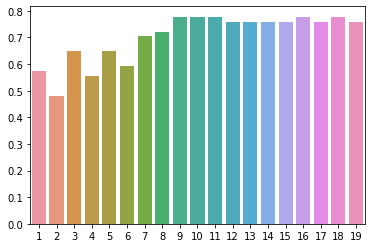

In [ ]:
k_values = list(range(1,20))
accuracy_list = []
for k in k_values:
  knn_model = KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(X_train,y_train)
  y_predy = knn_model.predict(X_test) 
  accuracy_list.append(metrics.accuracy_score(y_test,y_predy))
    
# plotting k-value vs accuracy plot
sb.barplot(k_values, accuracy_list)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 9)
knn_model.fit(X_train,y_train)
y_predy = knn_model.predict(X_test)


In [ ]:
print(confusion_matrix(y_test,y_predy))

[[ 2 11]
 [ 1 40]]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


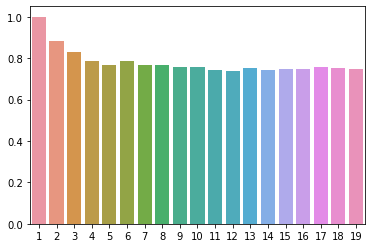

In [ ]:
#ICA
k_values = list(range(1,20))
accuracy_list = []


for k in k_values:
  ica = FastICA(n_components=3)
  X_ica = ica.fit_transform(X)
  knn_model = KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(X_ica,y)
  y_pred_icc = knn_model.predict(X_ica) 
  accuracy_list.append(metrics.accuracy_score(y,y_pred_icc))
    
# plotting k-value vs accuracy plot
sb.barplot(k_values, accuracy_list)

In [ ]:
ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)
knn_model = KNeighborsClassifier(n_neighbors = )
knn_model.fit(X_ica,y)
y_pred_icc = knn_model.predict(X_ica) 

In [ ]:
print(confusion_matrix(y,y_pred_icc))

[[  0  67]
 [  0 199]]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


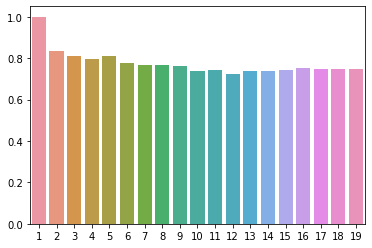

In [ ]:
#PCA
k_values = list(range(1,20))
accuracy_list = []


for k in k_values:
  pca = PCA(n_components = 2)
  X_pca = pca.fit_transform(X)
  knn_model = KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(X_pca,y)
  y_pred_pcc = knn_model.predict(X_pca) 
  accuracy_list.append(metrics.accuracy_score(y,y_pred_pcc))
    
# plotting k-value vs accuracy plot
sb.barplot(k_values, accuracy_list)

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(X_pca,y)
y_pred_pcc = knn_model.predict(X_pca) 

In [ ]:
print(confusion_matrix(y,y_pred_pcc))

[[  1  66]
 [  1 198]]


## Finding best distance metric

Accuracy for minkowski is 0.725
Accuracy for manhattan is 0.7375
Accuracy for cosine is 0.7375
Accuracy for jaccard is 0.775
Accuracy for hamming is 0.775


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


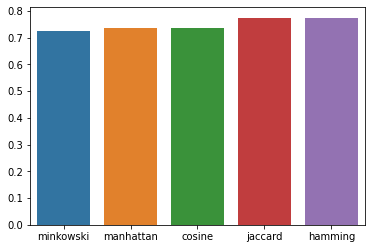

In [ ]:
d_metrics = ['minkowski','manhattan','cosine','jaccard','hamming']
accuracy_list = []


for d in d_metrics:
  ica = FastICA(n_components=3)
  X_ica = ica.fit_transform(X_train)
  knn_model = KNeighborsClassifier(n_neighbors = 5,metric = d)
  knn_model.fit(X_ica,y_train)
  x_ica_test = ica.fit_transform(X_test)
  y_pred_icc = knn_model.predict(x_ica_test) 
  a = metrics.accuracy_score(y_test,y_pred_icc)
  print(f"Accuracy for {d} is {a}")
  accuracy_list.append(metrics.accuracy_score(y_test,y_pred_icc))
    
# plotting k-value vs accuracy plot
sb.barplot(d_metrics, accuracy_list)

In [ ]:
metrics.accuracy_score(y_test,y_pred_icc)
    


# Other Models



## Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X, y)
print("score on test: " + str(mnb.score(X, y)))
print("score on train: "+ str(mnb.score(X, y)))

print("Accuracy is",metrics.accuracy_score(y_test,y_pred_pca)," when PCA is used")

In [ ]:
m = []

## Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)
m.append(acc_lr)
print("score on test: " + str(lr.score(X_test, y_test)))
print("score on train: "+ str(lr.score(X_train, y_train)))
print("Accuracy is",metrics.accuracy_score(y_test,y_pred_lr)," when Linear Regression is used")

score on test: 0.5375
score on train: 1.0
Accuracy is 0.5375  when Linear Regression is used


## SVM

In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC()
svm.fit(X_train, y_train)
acc_svm = svm.score(X_test, y_test)
m.append(acc_svm)
print("score on test: " + str(svm.score(X_test, y_test)))
print("score on train: "+ str(svm.score(X_train, y_train)))

score on test: 0.4125
score on train: 1.0


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
m.append(clf.score(X_test, y_test))
print("score on test: "  + str(clf.score(X_test, y_test)))
print("score on train: " + str(clf.score(X_train, y_train)))

score on test: 0.625
score on train: 1.0


### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)
m.append(bg.score(X_test, y_test))
print("score on test: " + str(bg.score(X_test, y_test)))
print("score on train: "+ str(bg.score(X_train, y_train)))

score on test: 0.675
score on train: 0.9032258064516129


### Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, y_train)
m.append(adb.score(X_test, y_test))
print("score on test: " + str(adb.score(X_test, y_test)))
print("score on train: "+ str(adb.score(X_train, y_train)))

score on test: 0.625
score on train: 1.0


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
m.append(rf.score(X_test, y_test))
print("score on test: " + str(rf.score(X_test, y_test)))
print("score on train: "+ str(rf.score(X_train, y_train)))

score on test: 0.75
score on train: 0.9838709677419355


### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
evc=VotingClassifier(estimators=[('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(X_train, y_train)
m.append(evc.score(X_test, y_test))
print("score on test: " + str(evc.score(X_test, y_test)))
print("score on train: "+ str(evc.score(X_train, y_train)))

score on test: 0.5125
score on train: 1.0


In [ ]:
m.append(metrics.accuracy_score(y_test,y_pred_ica))
m

[0.5375, 0.4125, 0.625, 0.675, 0.625, 0.75, 0.5125, 0.775]

In [ ]:
sb.barplot()

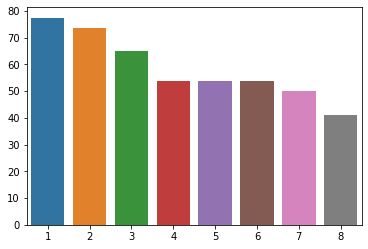

In [ ]:
model = [1,2,3,4,5,6,7,8 ]
m_accuracy_list = [77.5,73.75,65,53.75,53.75,53.75,50,41.25]
labels = ['KNN','Rnadom Forest','Boosting DT','Bagging DT','Decision Tree','Linear Regression','Voting Classifier','SVM']
sb.barplot(model, m_accuracy_list)


In [ ]:
metrics = 